# Module 2: Example of Support Vector Machines

In this notebook, we will use the `Support Vector Machine` implementation available in `scikit-learn` to classify the instances in the Iris flower dataset.

Let's import the required classes:

In [ ]:
# Import packages
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100,)
xtest shape:  (50, 4)
ytest shape:  (50,)


We will now create the classifier using the `SVC` class available in `scikit-learn`.

For this example, we will use the 'linear' kernel, but we could use whichever we wanted, such as the polynomial or the RBF, depending on the data complexity.

These are some of the parameters we can tweak for the `SVC`:

```
kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degree: int, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma: {‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.
```


In [ ]:
# Init the Classifier
model = SVC(kernel='linear')

We can now train the model:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

And once trained, predict the labels for the test set:

In [ ]:
# Predict Output 
pred = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(89.18, 0.5, 'Predicted')

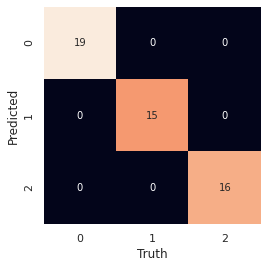

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Fixeu-vos com el SVM amb un kernel linial ja es capaç de separar correctament totes les mostres del dataset.

Remember that the `SVM` is an algorithm that improves the linear classifier since it looks for the best possible separating hyperplane by using the support vectors.

Look at the following example to remember how the SVM works. First, we will generate some synthetic data to classify:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


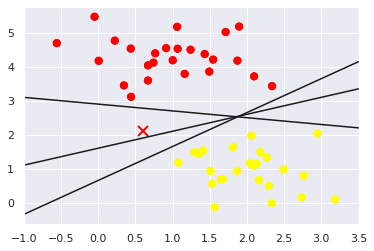

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

If you look at the figure you'll notice that there are 3 black lines that could be used to separating the different classes. In fact, there are infinite lines that could separate them. But which is the best one?

Looking at the red cross we can disregard the boundary that incorrectly classifies it as yellow, but we have still got plenty of possibilitites. Which one should we use?

This is what `SVC` is useful for: it tries to maximise the margin between elements of different classes:

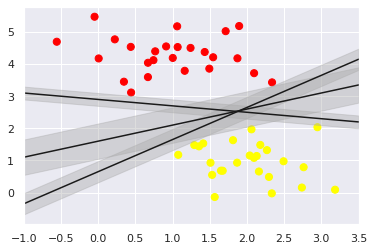

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

So what would a `SVC`do in this case? Which separating plane would it choose?

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

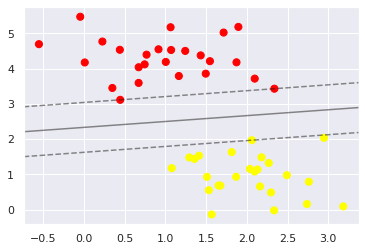

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

As you can see, it maximises the distance to the closest samples for each class and thus ensure the maximum margin between samples and separating hyperplane.